### Sampling from Homogeneous Poisson Process

In [1]:
# We simpy use lmbda = N(T)/T

### Sampling from Nonhomogeneous Poisson Process (One Cycle)

In [2]:
'''
SIMPLY linearly interpolate the observations

by convention, you should add 1 at time T
'''


'\nlinearly interpolate the observations\n\nby convention, you should add 1 at time T\n'

### Sampling from Nonhomogeneous Poisson Process (Multiple Cycle)

In [3]:
'''
Combine the arrivals 

divide by day number
'''

'\nCombine the arrivals \n\ndivide by day number\n'

example 

In [14]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [5]:
data = [np.array([0.1,0.7,0.9]),
       np.array([0.3,0.75,0.85]),
       np.array([0.4,0.71,0.82,0.94]),
       np.array([0.35,0.88])]

In [18]:
def fit_Lambda(data):
    k = len(data)
    t = np.sort(np.concatenate(data))
    t = np.insert(t,0,0.0)
    t = np.concatenate([t,np.array([1.0])])
    N = np.arange(0,len(t))/k
    Lambda = interp1d(t,N)
    Lambda_inv = interp1d(N,t)
    return Lambda, Lambda_inv

In [19]:
Lambda, Lambda_inv = fit_Lambda(data)

In [20]:
#notice that you got the Lambda_inv, which means you probably can do inversion method after your sepculation on lambda(t)

example

In [25]:
def fit_Lambda(data):
    k = len(data)
    t = np.sort(np.concatenate(data))
    t = np.insert(t,0,0.0)
    t = np.concatenate([t,np.array([24.0])])
    N = np.arange(0,len(t))/k
    Lambda = interp1d(t,N)
    Lambda_inv = interp1d(N,t)
    return Lambda, Lambda_inv

In [26]:
S_1 = [8,21]
S_2 = [3,11,19]
S_3 = [4,17,22,23]
S_4 = [6,9,10,14]

In [27]:
data = [S_1,S_2,S_3,S_4]

In [28]:
Lambda, Lambda_inv = fit_Lambda(data)

In [31]:
ts = np.sort(np.hstack([[0.,24.],S_1,S_2,S_3,S_4]))
Ns = np.arange(ts.shape[0]) / 4

In [36]:
def lmbda(t):
    if (t<= ts[0]) or (t >= ts[-1]):
        return 0
    l = np.where(ts<=t)[0].max()
    n = np.where(ts>=t)[0].min()
    return 1/(ts[n]-ts[l])

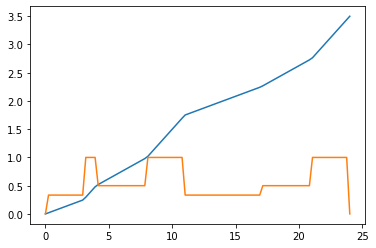

In [38]:
xs = np.linspace(0,24,99)
plt.plot(xs,Lambda(xs))
plt.plot(xs,[lmbda(t) for t in xs])

In [62]:
def sample_inversion():
    t = 0
    arrivals = []
    while True:
        dt = np.random.exponential()
        if t + dt > Lambda(24):
            return np.array(arrivals)
        t += dt
        arrivals.append(Lambda_inv(t))

In [63]:
samples = [sample_inversion() for _ in range(10000)]

(array([0.02540354, 0.02494218, 0.02329859, 0.06862705, 0.03610129,
        0.03491906, 0.03563993, 0.03517857, 0.07122219, 0.0689154 ,
        0.07505723, 0.0239618 , 0.02407714, 0.02381762, 0.02514403,
        0.02425015, 0.02358694, 0.03514974, 0.03390984, 0.03428469,
        0.03584177, 0.07260626, 0.0726351 , 0.07151054]),
 array([1.36415403e-03, 1.00128353e+00, 2.00120291e+00, 3.00112229e+00,
        4.00104167e+00, 5.00096105e+00, 6.00088043e+00, 7.00079981e+00,
        8.00071919e+00, 9.00063857e+00, 1.00005579e+01, 1.10004773e+01,
        1.20003967e+01, 1.30003161e+01, 1.40002355e+01, 1.50001548e+01,
        1.60000742e+01, 1.69999936e+01, 1.79999130e+01, 1.89998324e+01,
        1.99997517e+01, 2.09996711e+01, 2.19995905e+01, 2.29995099e+01,
        2.39994293e+01]),
 <BarContainer object of 24 artists>)

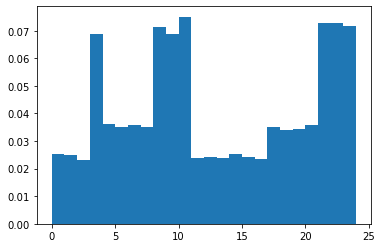

In [65]:
plt.hist(np.hstack(samples), density = True,  bins = 24)

In [68]:
def max_iav(arrivals):
    return np.max(np.diff(np.hstack([[0.],arrivals,[24.]])))

(array([0.0041007 , 0.01628563, 0.03667197, 0.05530085, 0.07404691,
        0.09173849, 0.10029138, 0.10263464, 0.07920207, 0.07955356,
        0.09208998, 0.07920207, 0.06350225, 0.0456935 , 0.03491452,
        0.0365548 , 0.02753326, 0.02882206, 0.02425271, 0.02132363,
        0.01687145, 0.01382521, 0.04721662]),
 array([ 4.36920043,  5.22271345,  6.07622648,  6.9297395 ,  7.78325253,
         8.63676555,  9.49027858, 10.3437916 , 11.19730463, 12.05081765,
        12.90433068, 13.7578437 , 14.61135673, 15.46486975, 16.31838278,
        17.1718958 , 18.02540883, 18.87892185, 19.73243488, 20.5859479 ,
        21.43946093, 22.29297395, 23.14648698, 24.        ]),
 <BarContainer object of 23 artists>)

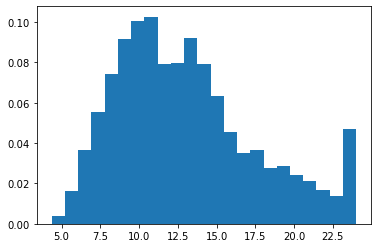

In [69]:
plt.hist([max_iav(s) for s in samples],density = True, bins = 23)